# Graph Neural Network (GNN)

Training a Graph Neural Network (GNN) involves several well-defined steps, similar to other machine learning workflows, but with additional considerations for graph-based data.

---

### **1. Data Preparation**
1. **Graph Representation**:
   - Represent the input data as a graph:
     - **Nodes**: Entities in the data.
     - **Edges**: Relationships between entities.
     - **Node Features**: Feature vectors for each node.
     - **Edge Features (Optional)**: Attributes for each edge.

2. **Dataset Splitting**:
   - Split the data into training, validation, and test sets:
     - For node-level tasks, split the nodes.
     - For graph-level tasks, split the graphs.

3. **Batching (Optional)**:
   - Use batching for graph-level tasks when multiple graphs are present (e.g., MUTAG dataset).
   - Libraries like `torch_geometric.data.DataLoader` handle batching efficiently.

---

### **2. Model Design**
1. **Choose a GNN Architecture**:
   - Common GNN layers:
     - **GCNConv**: Graph Convolutional Networks (GCN).
     - **GATConv**: Graph Attention Networks (GAT).
     - **GraphSAGE**: Sampling-based aggregation.
   - Additional layers:
     - Pooling layers for graph-level tasks (e.g., global mean pooling).
     - Fully connected layers for predictions.

2. **Define the Forward Pass**:
   - Pass the node/graph features and edge indices through the GNN layers.
   - Aggregate node features using message passing mechanisms.

---

### **3. Loss Function**
1. **Choose the Appropriate Loss**:
   - **Node Classification**: Cross-entropy loss for multi-class node labels.
   - **Graph Classification**: Cross-entropy loss for graph-level labels.
   - **Link Prediction**: Binary cross-entropy for edge existence probabilities.

---

### **4. Optimization**
1. **Select Optimizer**:
   - Common choices: Adam, SGD.
   - Adjust learning rate and weight decay for regularization.

2. **Regularization**:
   - Techniques like dropout and L2 weight regularization to prevent overfitting.

---

### **5. Training Loop**
1. **Forward Pass**:
   - Compute the output of the GNN for the input graph(s).

2. **Compute Loss**:
   - Compare the predicted output with the ground truth using the loss function.

3. **Backpropagation**:
   - Compute gradients with respect to model parameters.

4. **Update Weights**:
   - Update the model's weights using the optimizer.

---

### **6. Validation**
1. **Evaluate Performance**:
   - Use the validation set to monitor the model's performance during training.
   - Compute metrics like accuracy, precision, recall, or F1-score.

2. **Early Stopping**:
   - Stop training if the validation performance stops improving for a predefined number of epochs.

---

### **7. Testing**
1. **Final Evaluation**:
   - Test the model on the unseen test set.
   - Report metrics to evaluate generalization performance.

---

### **8. Hyperparameter Tuning**
1. **Tune Parameters**:
   - Learning rate, hidden layer dimensions, number of layers, etc.
   - Use techniques like grid search or Bayesian optimization.

2. **Monitor Metrics**:
   - Optimize metrics like accuracy or loss on the validation set.

---

### **9. Deployment**
1. **Save the Model**:
   - Serialize the trained model using libraries like `torch.save`.

2. **Inference**:
   - Use the trained model to make predictions on new, unseen graph data.

In [ ]:
# Example Workflow in PyTorch Geometric
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Define a simple GNN model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Training loop
def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Validation and Testing
def evaluate(model, data, mask):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        correct = (pred[mask] == data.y[mask]).sum().item()
        acc = correct / mask.sum().item()
    return acc

# Example dataset and training setup
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

model = GNN(dataset.num_node_features, 16, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

for epoch in range(100):
    loss = train(model, optimizer, data)
    val_acc = evaluate(model, data, data.val_mask)
    print(f"Epoch {epoch}, Loss: {loss:.4f}, Validation Accuracy: {val_acc:.4f}")

## Graph Theory

In [5]:
import numpy as np

mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
mileposts

array([   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448])

In [7]:
mileposts[:, np.newaxis]

array([[   0],
       [ 198],
       [ 303],
       [ 736],
       [ 871],
       [1175],
       [1475],
       [1544],
       [1913],
       [2448]])

In [8]:
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

## NetworkX

```shell
pip install networkx -U
```

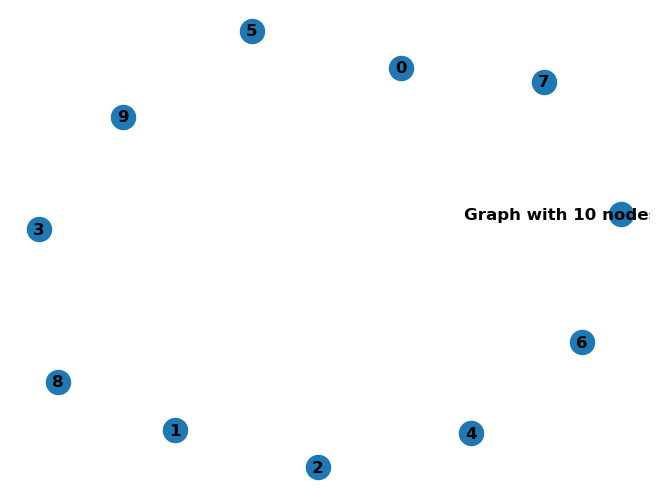

In [17]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

G = nx.Graph() # create a graph
G.add_node(1) # add a node
G.add_nodes_from([2, 3]) # add a list of nodes
G.add_nodes_from([ # add any iterable container of nodes
    (4, {"color": "red"}), # node 4 has an attribute "color" with value "red"
    (5, {"color": "green"}), # node 5 has an attribute "color" with value "green"
])

H = nx.path_graph(10) # create a path graph with 10 nodes

G.add_nodes_from(H) # add all nodes from H as nodes in G

G.add_node(H) # add H as a node in G

nx.draw(G, with_labels=True, font_weight='bold') # draw the graph

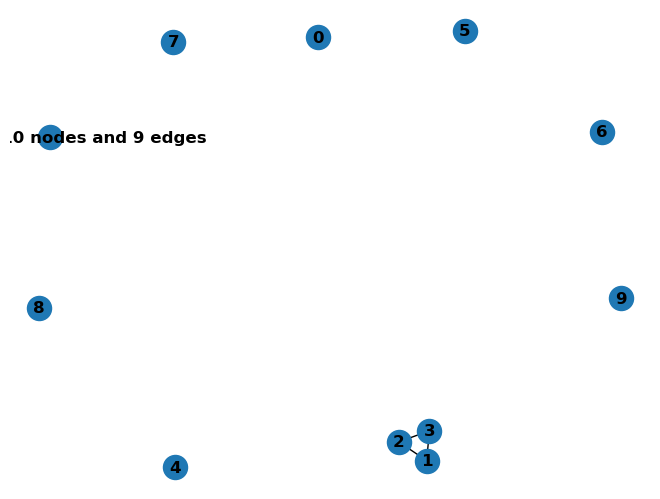

In [23]:
G.add_edge(1, 2) # add an edge between 1 and 2 
e = (2, 3) # create an edge between 2 and 3
G.add_edge(*e) # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)]) # add edges from a list
nx.draw(G, with_labels=True, font_weight='bold') # draw the graph

In [24]:
G.number_of_nodes(), G.number_of_edges() # get the number of nodes

(11, 3)

In [25]:
G.nodes(), G.edges() # get the nodes and edges

(NodeView((1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x1334b9110>)),
 EdgeView([(1, 2), (1, 3), (2, 3)]))

In [28]:
G.add_edges_from( [ (3, 4), (4, 5) ], color = 'red' ) # add edges with attributes
G[1], G[4]

(AtlasView({2: {}, 3: {}}),
 AtlasView({3: {'color': 'red'}, 5: {'color': 'red'}}))

In [29]:
G.remove_node(2) # remove a node
G.remove_edge(1, 3) # remove an edge
G.remove_nodes_from( [4, 5] ) # remove multiple nodes
G.remove_edges_from( [ (1, 2), (2, 3) ] ) # remove multiple edges

/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


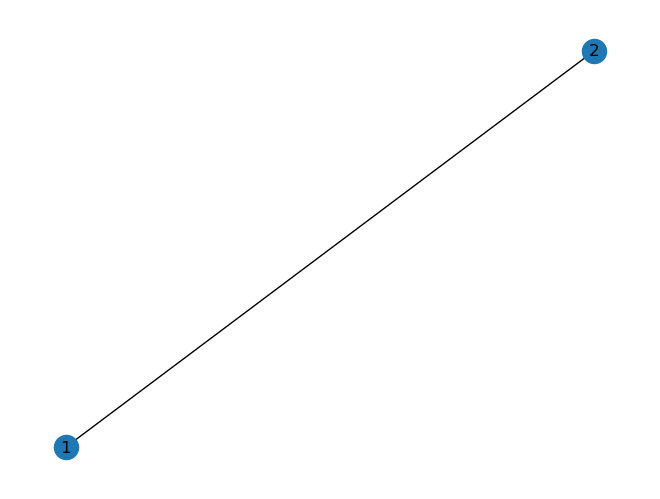

In [31]:
G = nx.Graph( [(1, 2, {"color": "yellow"})] ) # create a graph with an edge attribute
nx.draw(G, with_labels=True, cmap = plt.get_cmap('rainbow') ) # draw the graph

In [33]:
G.clear()

#### Edge 可以加入任意屬性，例如 weight, distance, 或其他衡量值

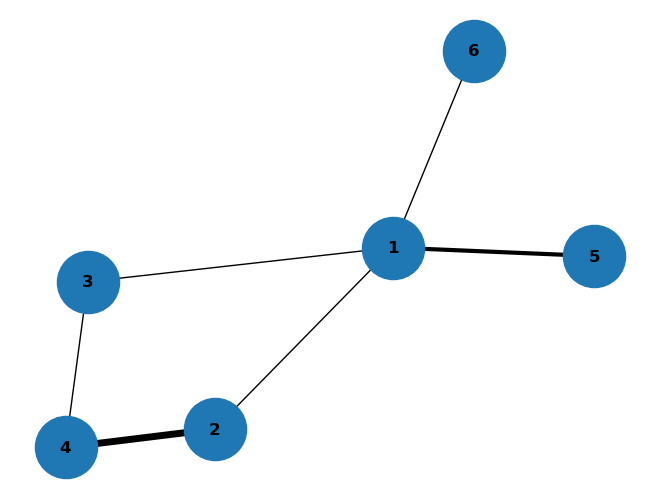

In [34]:
G = nx.Graph()

G.add_edge( "1", "2")
G.add_edge( "1", "6")
G.add_edges_from( [("1", "3"),
                    ["3", "4"]])

G.add_edges_from( [("1", "5", {"weight" : 3}),
                    ("2", "4", {"weight" : 5})])
weights =[1 if G[u][v] == {} else G[u][v]["weight"] for u, v in G.edges()]
nx.draw(G, with_labels=True, font_weight='bold', node_size=2000, width=weights)

## GNN

### Planetoid data set

- The Planetoid dataset in `torch_geometric` is a collection of benchmark datasets frequently used for evaluating graph-based machine learning models, especially in the context of semi-supervised learning. 

- These datasets include citation networks where nodes represent papers, edges represent citations, and node features are derived from the text of the papers.

#### Planetoid Datasets Overview

The Planetoid dataset was introduced in the paper "Semi-Supervised Classification with Graph Convolutional Networks" by Kipf and Welling (2016). It includes the following datasets:

#### 1. Cora:

  - A citation network where nodes represent scientific papers in the domain of machine learning.
  - Edges denote citations between papers.
  - Features are derived from the bag-of-words representation of paper content.
  - Labels are the topics of the papers.

#### 2. CiteSeer:

  - Another citation network dataset, similar in structure to Cora.
  - Nodes are papers, edges are citations, and features are derived from paper content.
  - Labels represent six classes (topics).

#### 3. PubMed:

  - A citation network of medical research papers.
  - Features are derived from Term Frequency-Inverse Document Frequency (TF-IDF).
  - Labels indicate the type of diabetes (3 classes).
  - Key Properties of Planetoid Datasets
  - Nodes (vertices): Represent entities (papers).
  - Edges: Represent relationships (citations).
  - Node Features: Represent attributes (text-based features).
  - Labels: Represent class categories for semi-supervised or supervised learning.

In [38]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='./tmp/Cora', name='Cora')

# Inspecting the dataset
print(f"Dataset: {dataset}")
print(f"Number of Graphs: {len(dataset)}")
print(f"Number of Nodes: {dataset[0].num_nodes}")
print(f"Number of Edges: {dataset[0].num_edges}")
print(f"Number of Node Features: {dataset.num_features}")
print(f"Number of Classes: {dataset.num_classes}")

Dataset: Cora()
Number of Graphs: 1
Number of Nodes: 2708
Number of Edges: 10556
Number of Node Features: 1433
Number of Classes: 7


### Accessing the Data
Each dataset provides a single graph object:

In [39]:
data = dataset[0]  # Graph data object

print(data)
# Attributes include: x (node features), edge_index (edge list), y (labels)
print(data.x.shape)  # Node features [num_nodes, num_features]
print(data.edge_index.shape)  # Edge list [2, num_edges]
print(data.y.shape)  # Labels [num_nodes]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
torch.Size([2708, 1433])
torch.Size([2, 10556])
torch.Size([2708])


#### Example Usage with GCN

In [41]:
device = None
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS backend is available.")
else:
    device = torch.device("cpu")
    print("MPS backend is not available.")

MPS backend is available.


In [42]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GCN(dataset.num_features, 16, dataset.num_classes).to(device)
data = dataset[0].to(device)

# Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
model.train()

for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 1.9518340826034546
Epoch: 1, Loss: 1.850672960281372
Epoch: 2, Loss: 1.7339791059494019
Epoch: 3, Loss: 1.596469521522522
Epoch: 4, Loss: 1.4630241394042969
Epoch: 5, Loss: 1.3260077238082886
Epoch: 6, Loss: 1.2072503566741943
Epoch: 7, Loss: 1.057678461074829
Epoch: 8, Loss: 0.9913552403450012
Epoch: 9, Loss: 0.8673268556594849
Epoch: 10, Loss: 0.7570816278457642
Epoch: 11, Loss: 0.7163254618644714
Epoch: 12, Loss: 0.6111709475517273
Epoch: 13, Loss: 0.5414985418319702
Epoch: 14, Loss: 0.5017684102058411
Epoch: 15, Loss: 0.4230004847049713
Epoch: 16, Loss: 0.35448095202445984
Epoch: 17, Loss: 0.3632790148258209
Epoch: 18, Loss: 0.343916118144989
Epoch: 19, Loss: 0.27651605010032654
Epoch: 20, Loss: 0.28071528673171997
Epoch: 21, Loss: 0.2315608114004135
Epoch: 22, Loss: 0.20791859924793243
Epoch: 23, Loss: 0.18904778361320496
Epoch: 24, Loss: 0.1674937754869461
Epoch: 25, Loss: 0.16227345168590546
Epoch: 26, Loss: 0.12940175831317902
Epoch: 27, Loss: 0.1490360051393509

#### Model evaluation

In [43]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f"Accuracy: {acc}")

Accuracy: 0.8


### Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data.y[data.test_mask].cpu().numpy(), pred[data.test_mask].cpu().numpy())

array([[ 89,   4,   2,   7,   7,   7,  14],
       [  2,  80,   3,   3,   1,   1,   1],
       [  3,   8, 129,   3,   0,   1,   0],
       [ 14,  11,   5, 239,  36,   9,   5],
       [  8,   1,   0,   7, 128,   4,   1],
       [  6,   4,   4,   1,   0,  80,   8],
       [  4,   0,   0,   1,   0,   4,  55]])

#### Visualization (using TSNE algorithm to 2 Principle Component)

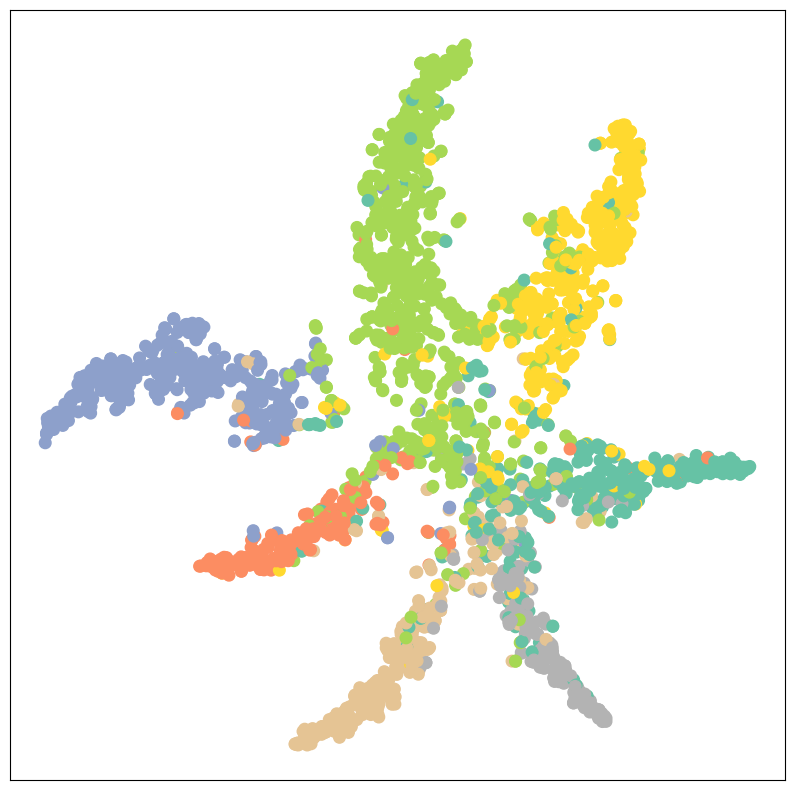

In [46]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

model.eval()
out = model(data)
visualize(out.cpu(), color=data.cpu().y)

# MUTAG dataset from torch_geometric.datasets.TUDataset

The MUTAG dataset is a widely-used benchmark dataset in the field of graph learning and machine learning on graphs. It is part of the TUDataset collection, which includes many graph-based datasets for tasks such as graph classification and regression.

## Key Features of the MUTAG Dataset:

### 1. Domain:

  - MUTAG comes from the domain of cheminformatics and is used to analyze molecular structures.

### 2. Graph Representation:

  - Nodes: Represent atoms in a molecule.
  - Edges: Represent chemical bonds between atoms.

### 3. Node Features:

  - Each node (atom) has features that describe its chemical properties, such as the type of atom (e.g., carbon, oxygen).

### 4. Task:

  - Graph Classification:
    - The task is to classify each graph (molecule) into one of two classes: mutagenic or non-mutagenic.
    - The labels indicate whether a compound is likely to cause mutations in organisms.

### 5. Dataset Statistics:

  - Graphs: 188 molecular graphs.
  - Classes: 2 (mutagenic and non-mutagenic).
  - Nodes per Graph: Each graph typically has between 10-30 nodes (atoms).
  - Edges per Graph: Each graph has a few dozen edges representing chemical bonds.

### 6. Applications:

  - Evaluating the performance of graph classification algorithms.
  - Studying the effectiveness of Graph Neural Networks (GNNs) in molecular data.

### 7. Accessibility:

  - Available in the TUDataset collection and can be accessed via the torch_geometric library in Python.

### Example Use Case:
In molecular chemistry, predicting mutagenicity is important for assessing the biological safety of chemical compounds. MUTAG serves as a benchmark for testing the ability of graph-based algorithms to classify molecular structures based on their mutagenic properties.

In [50]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

# Step 1: Load the MUTAG dataset
dataset = TUDataset(root="./tmp/MUTAG", name="MUTAG")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of classes: {dataset.num_classes}")
print(f"Number of node features: {dataset.num_node_features}")

# Step 2: Define a Graph Neural Network (GNN)
class GNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_dim, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.linear = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)  # Global pooling over graph
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Step 3: Prepare data for training and testing
torch.manual_seed(12345)
dataset = dataset.shuffle()
train_dataset = dataset[:150]
test_dataset = dataset[150:]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 4: Instantiate the GNN model
model = GNN(dataset.num_node_features, hidden_dim=64, num_classes=dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Step 5: Define training and testing loops
def train():
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()

def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        out = model(data)
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    return correct / len(loader.dataset)

# Step 6: Train the model and evaluate performance
for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    if epoch % 20 == 0:
        print(f"Epoch: {epoch}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")



Processing...
Done!
/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Number of graphs: 188
Number of classes: 2
Number of node features: 7
Epoch: 20, Train Accuracy: 0.7533, Test Accuracy: 0.7632
Epoch: 40, Train Accuracy: 0.7267, Test Accuracy: 0.7895
Epoch: 60, Train Accuracy: 0.7400, Test Accuracy: 0.7895
Epoch: 80, Train Accuracy: 0.7667, Test Accuracy: 0.7895
Epoch: 100, Train Accuracy: 0.7467, Test Accuracy: 0.7895
Epoch: 120, Train Accuracy: 0.7400, Test Accuracy: 0.7632
Epoch: 140, Train Accuracy: 0.7800, Test Accuracy: 0.8158
Epoch: 160, Train Accuracy: 0.7800, Test Accuracy: 0.8158
Epoch: 180, Train Accuracy: 0.7800, Test Accuracy: 0.7895
Epoch: 200, Train Accuracy: 0.7800, Test Accuracy: 0.7895


# Use a PDF file to gnerate data for GNN training

## Step-by-Step Process
### 1. Extract Nodes:

  - Nodes can represent:
    - Sections: Each section of the paper (e.g., Introduction, Methods, Results).
    - References: Each cited article becomes a node.
    - Keywords: Extract keywords listed in the paper.
    - Authors: Each author of the paper.
    - Example: "Introduction" and "Recurrent Neural Networks" can be two nodes if sections and topics are chosen as nodes.

### 2. Define Edges:

  - Relationships:
    - A section is linked to references it cites.
    - Sections are linked if one directly refers to or logically follows another (e.g., Introduction → Methods).
    - Keywords are connected to sections where they are mentioned.
    - Authors are linked to the sections they wrote (if provided).
  - Edge weights can represent:
    - Frequency of citation.
    - Degree of relationship (e.g., how often a keyword appears in a section).

### 3. Generate Node Features:

  - Features for nodes can include:
    - Text embeddings: Use techniques like TF-IDF, Word2Vec, or BERT embeddings for sections or keywords.
    - Metadata: For example, for references, include the year of publication or journal name.

### 4. Create the Graph:

  - Use libraries like NetworkX or torch_geometric to define the graph structure with nodes, edges, and features.

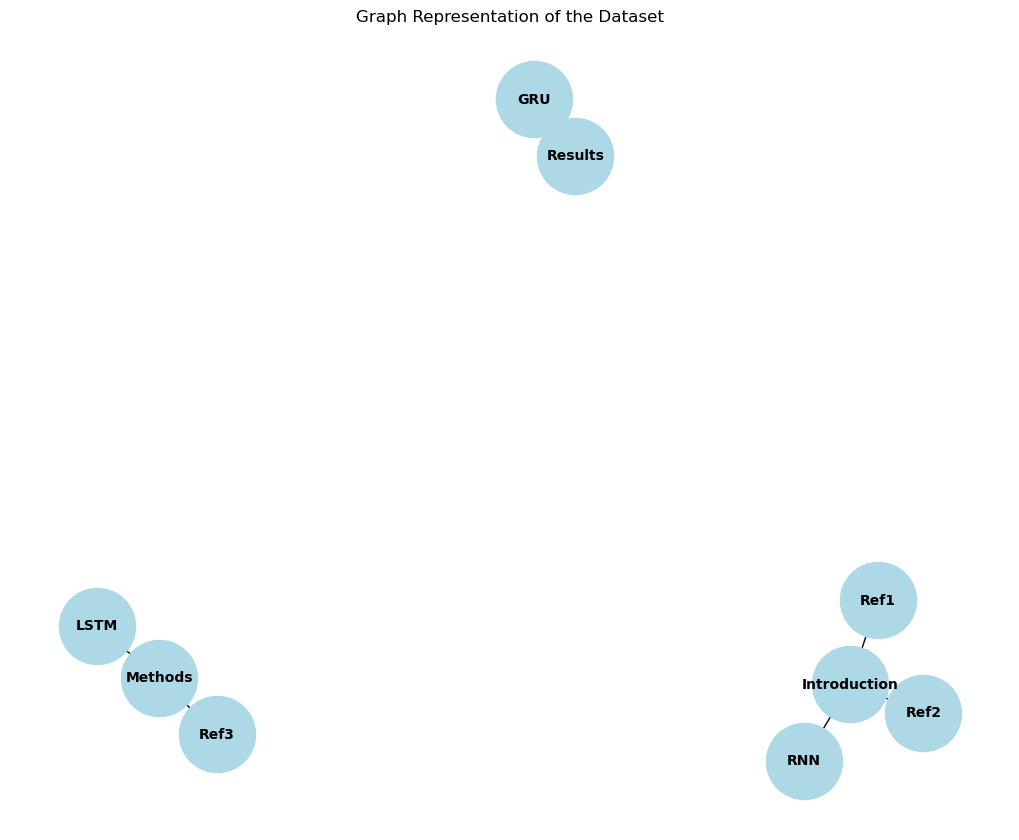

In [48]:
import torch
from torch_geometric.data import Data
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Example: Sample data extracted from the document
sections = ["Introduction", "Methods", "Results"]
references = ["Ref1", "Ref2", "Ref3"]
keywords = ["RNN", "LSTM", "GRU"]

# Create Nodes
nodes = sections + references + keywords
node_features = TfidfVectorizer().fit_transform(nodes).toarray()  # Example TF-IDF features

# Define Edges
edges = [
    (0, 3),  # Introduction cites Ref1
    (0, 4),  # Introduction cites Ref2
    (1, 5),  # Methods cites Ref3
    (0, 6),  # Introduction mentions RNN
    (1, 7),  # Methods mentions LSTM
    (2, 8)   # Results mentions GRU
]

# Convert edges to tensor
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create PyTorch Geometric Data
data = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index)

# Function to draw the graph
def draw_graph(nodes, edges):
    # Create a NetworkX graph from the edges
    G = nx.Graph()
    G.add_edges_from(edges)
    
    # Assign labels to nodes
    labels = {i: node for i, node in enumerate(nodes)}
    
    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Layout for visualization
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
    plt.title("Graph Representation of the Dataset")
    plt.show()

# Call the function to draw the graph
draw_graph(nodes, edges)